# Lab 3
## Tên: Phan Đức Huy, Mã SV: 22AD021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
last_id = 14

#### Câu 1
a)

In [3]:
def p_norm(x, p):
    """Calculate the p-norm of vector x for given p."""
    if p == 0:
        # For p = 0, return the number of non-zero elements
        return np.sum(x != 0)
    else:
        # For p != 0, calculate the p-norm
        return np.linalg.norm(x, ord=p)

# Input vector
x = np.array([-58, 58])

# List of p values to test
p_values = [0, 1, 2, 5, 10]

# Calculate and compare p-norms
for p in p_values:
    norm_manual = p_norm(x, p)
    norm_builtin = np.linalg.norm(x, ord=p)
    
    print(f"p-norm with p={p} (manual calculation): {norm_manual}")
    print(f"p-norm with p={p} (numpy.linalg.norm): {norm_builtin}")
    print(f"Match: {np.isclose(norm_manual, norm_builtin)}")
    print()


p-norm with p=0 (manual calculation): 2
p-norm with p=0 (numpy.linalg.norm): 2.0
Match: True

p-norm with p=1 (manual calculation): 116.0
p-norm with p=1 (numpy.linalg.norm): 116.0
Match: True

p-norm with p=2 (manual calculation): 82.02438661763951
p-norm with p=2 (numpy.linalg.norm): 82.02438661763951
Match: True

p-norm with p=5 (manual calculation): 66.62450458982805
p-norm with p=5 (numpy.linalg.norm): 66.62450458982805
Match: True

p-norm with p=10 (manual calculation): 62.16286082710502
p-norm with p=10 (numpy.linalg.norm): 62.16286082710502
Match: True



b)

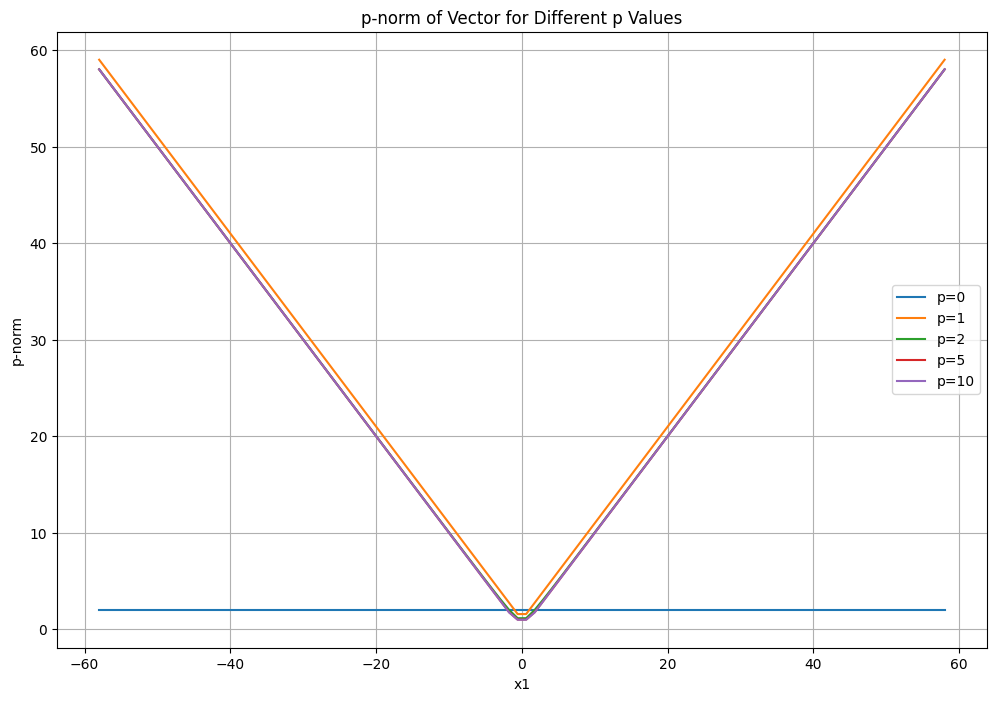

In [4]:
def calculate_p_norm(x1, p):
    """Calculate p-norm of vector x for given p."""
    x = np.array([x1, 1])  # Example for x2 = 1
    if p == 0:
        return np.sum(x != 0)
    else:
        return np.linalg.norm(x, ord=p)

# Generate 100 values of x1 from [-1, 1]
x1_values = np.linspace(-58, 58, 100)

# List of p values
p_values = [0, 1, 2, 5, 10]

# Plotting
plt.figure(figsize=(12, 8))

for p in p_values:
    x2_values = [calculate_p_norm(x1, p) for x1 in x1_values]
    plt.plot(x1_values, x2_values, label=f'p={p}')

plt.title('p-norm of Vector for Different p Values')
plt.xlabel('x1')
plt.ylabel('p-norm')
plt.legend()
plt.grid(True)
plt.show()

#### Câu 2

In [5]:
def inner_product(x, y):
    """Calculate the inner product of vectors x and y."""
    return np.sum(x * y)

# Define vectors x and y
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

# Calculate inner product manually
inner_product_manual = inner_product(x, y)

# Calculate inner product using numpy.dot()
inner_product_builtin = np.dot(x, y)

# Print results
print(f"Inner product calculated manually: {inner_product_manual}")
print(f"Inner product using numpy.dot(): {inner_product_builtin}")

# Verify if both methods give the same result
assert np.isclose(inner_product_manual, inner_product_builtin), "The manual and numpy.dot() results do not match."


Inner product calculated manually: 32
Inner product using numpy.dot(): 32


#### Câu 3

a)

In [6]:

def project_onto(v, b):
    """Project vector v onto vector b."""
    b = np.array(b)
    v = np.array(v)
    return (np.dot(v, b) / np.dot(b, b)) * b


b)

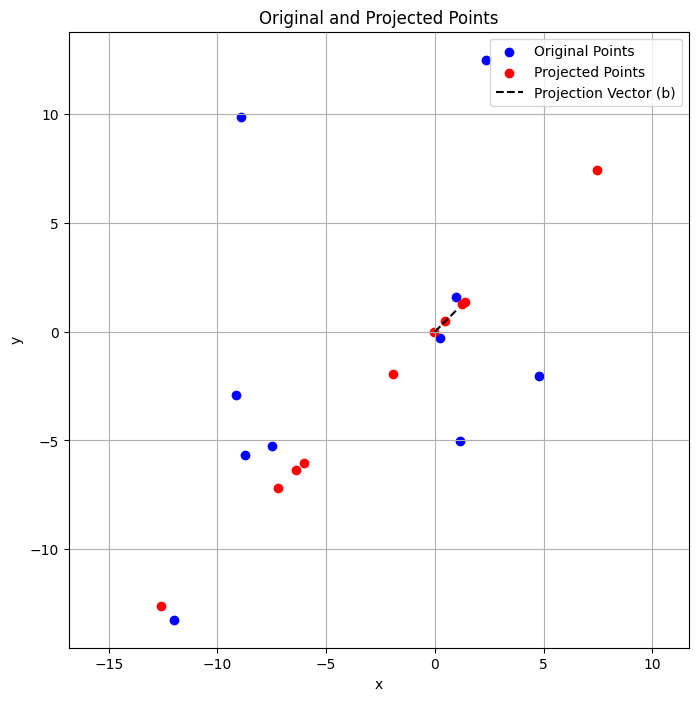

In [7]:
# Parameters
num_points = 10

# Generate random points
points = np.random.uniform(-last_id, last_id, (num_points, 2))

# Define the projection vector b
b = (1, 1)

# Project points onto vector b
projected_points = np.array([project_onto(point, b) for point in points])

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Original Points')
plt.scatter(projected_points[:, 0], projected_points[:, 1], color='red', label='Projected Points')
plt.plot([0, b[0]], [0, b[1]], 'k--', label='Projection Vector (b)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original and Projected Points')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

c)

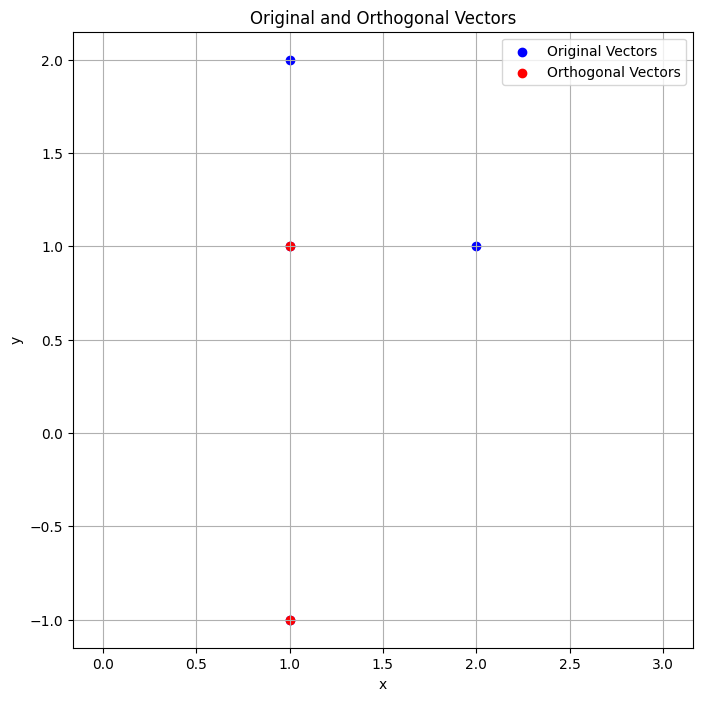

In [8]:
def gram_schmidt(V):
    """Perform Gram-Schmidt orthogonalization on the list of vectors V."""
    U = []
    for v in V:
        u = np.array(v, dtype=float)  # Ensure the vector is of type float
        for u_prev in U:
            u_prev = np.array(u_prev, dtype=float)  # Ensure previous vector is of type float
            u -= np.dot(u_prev, u) / np.dot(u_prev, u_prev) * u_prev
        if np.linalg.norm(u) > 1e-10:  # Avoid adding zero vectors
            U.append(u)
    return np.array(U)

# Define some vectors for testing
V = np.array([
    [1, 1],
    [1, -1],
    [2, 1],
    [1, 2]
], dtype=float)  # Ensure the initial array is of type float

# Apply Gram-Schmidt orthogonalization
orthogonal_vectors = gram_schmidt(V)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(V[:, 0], V[:, 1], color='blue', label='Original Vectors')
plt.scatter(orthogonal_vectors[:, 0], orthogonal_vectors[:, 1], color='red', label='Orthogonal Vectors')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original and Orthogonal Vectors')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

#### Câu 4

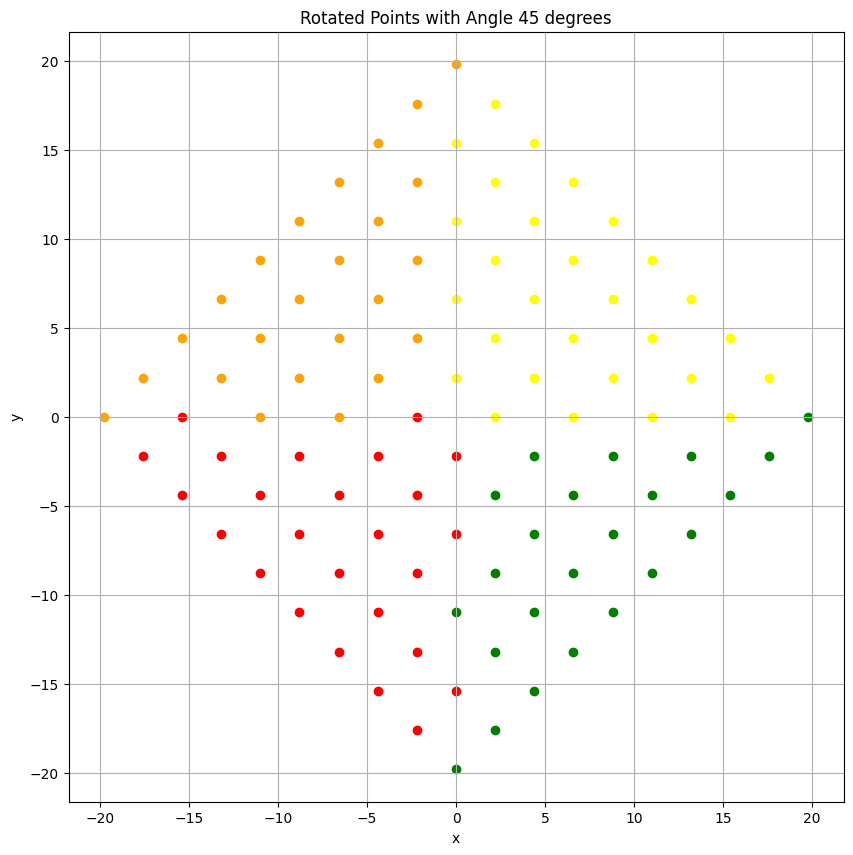

In [9]:

def rotate_points(x, y, angle):
    """Rotate points by a given angle."""
    # Rotation matrix
    theta = np.radians(angle)
    R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    # Rotate each point
    points = np.array([[xi, yi] for xi in x for yi in y])
    rotated_points = points @ R.T  # Apply rotation
    return rotated_points

# Parameters
angle = 45  # Example rotation angle

# Generate 10 values of x and y from [-ID, ID]
x_values = np.linspace(-last_id, last_id, 10)
y_values = np.linspace(-last_id, last_id, 10)

# Create 100 data points
points = np.array([[xi, yi] for xi in x_values for yi in y_values])

# Rotate points
rotated_points = rotate_points(x_values, y_values, angle)

# Plotting
plt.figure(figsize=(10, 10))

# Define colors based on quadrant
for (x, y) in rotated_points:
    if x >= 0 and y >= 0:
        color = 'yellow'
    elif x < 0 and y >= 0:
        color = 'orange'
    elif x < 0 and y < 0:
        color = 'red'
    else:
        color = 'green'
    
    plt.scatter(x, y, color=color)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Rotated Points with Angle {angle} degrees')
plt.grid(True)
plt.axis('equal')
plt.show()
